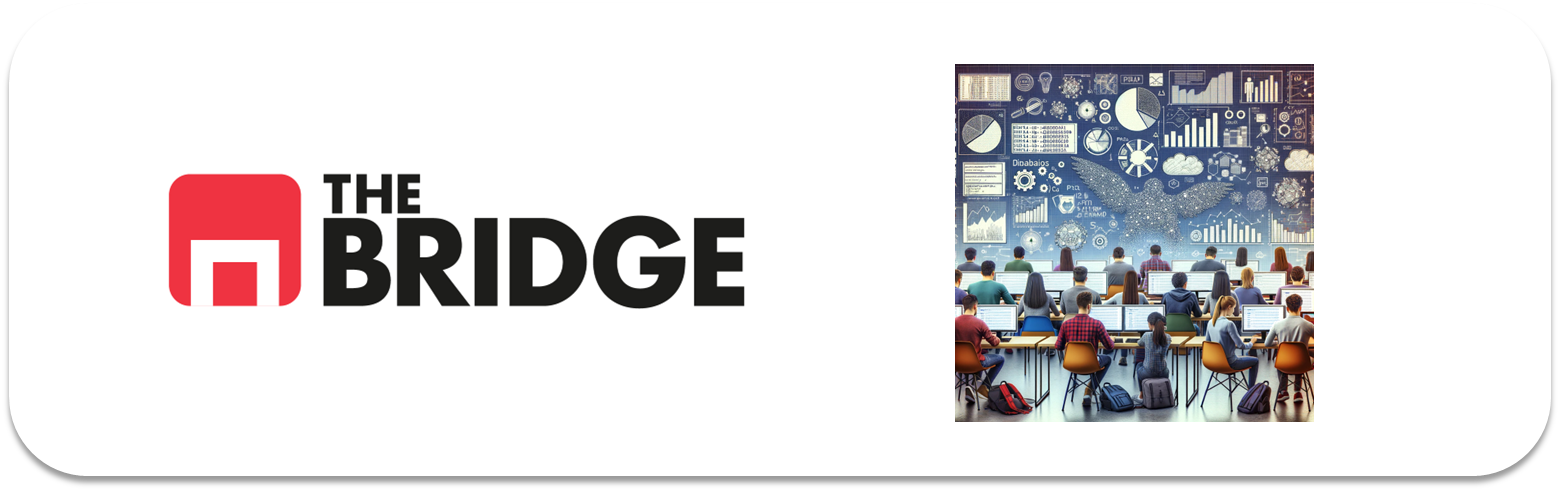

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en ***modelar la supervivencia en el Titanic***, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

In [361]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, balanced_accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay,classification_report

# Ajuste formato de gráficos
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

Importa los paquetes y módulos que necesites a lo largo del notebook.

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la ***probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete***. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



In [322]:
# 1. Cargar el dataset
df = pd.read_csv('./data/titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


* target = 'survived'
* features = 'pclass', 'age', 'sibsp', 'parch', 'fare', 'class', 'who','embark_town'
* eliminar = 'alive', 'deck', 'embarked', 'alone','sex','adult_male'

sibsp = Número de hermanos o cónyuges que viajaban con el pasajero.

Parch = Número de padres o hijos que viajaban con el pasajero.

In [324]:
data= df.drop(columns=['alive', 'deck', 'embarked', 'alone','sex','adult_male','class']) # Eliminar columnas porque la información que aportan es similar a la de otras variables (ej: embarked y embark_town)
data = data.dropna(subset=['age','embark_town']) # Eliminar instancias donde age = NaN

In [325]:
data

,survived,pclass,age,sibsp,parch,fare,who,embark_town
0,0,3,22.0,1,0,7.2500,man,Southampton
1,1,1,38.0,1,0,71.2833,woman,Cherbourg
2,1,3,26.0,0,0,7.9250,woman,Southampton
3,1,1,35.0,1,0,53.1000,woman,Southampton
4,0,3,35.0,0,0,8.0500,man,Southampton
...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,woman,Queenstown
886,0,2,27.0,0,0,13.0000,man,Southampton
887,1,1,19.0,0,0,30.0000,woman,Southampton
889,1,1,26.0,0,0,30.0000,man,Cherbourg


In [326]:
data.isna().sum()

survived       0
pclass         0
age            0
sibsp          0
parch          0
fare           0
who            0
embark_town    0
dtype: int64

#### 2. Definir y analizar la variable target

Frecuencias de clases: survived
0    59.550562
1    40.449438
Name: proportion, dtype: float64


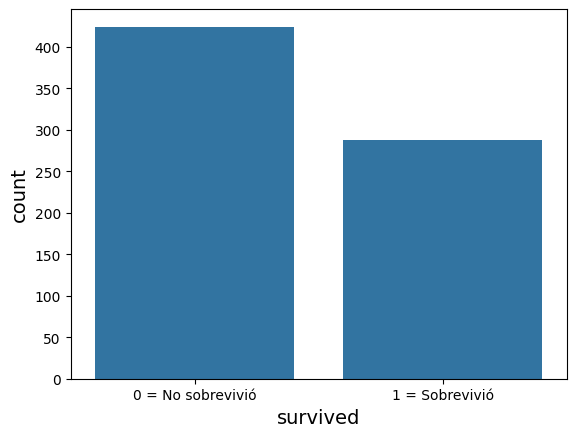

In [327]:
# 2. Variable target
target = data['survived']
print(f"Frecuencias de clases: {target.value_counts(normalize=True)*100}")

# Gráfica de targe
sns.countplot(x=target)

# Configurar los ticks personalizados en el eje x
plt.xticks(ticks=[0, 1], labels=['0 = No sobrevivió', '1 = Sobrevivió'])

# Mostrar el gráfico
plt.show()

In [328]:
# 3.Split en train y test, estratificando por la ciudad de embarque para que los dos dataset contengan la misma frecuencia de casos respecto a esta variable
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='survived'),target,test_size=0.2,stratify=data['embark_town'],random_state=42)

In [329]:
X_train['embark_town'].value_counts(normalize=True)

embark_town
Southampton    0.778559
Cherbourg      0.182777
Queenstown     0.038664
Name: proportion, dtype: float64

In [330]:
X_test['embark_town'].value_counts(normalize=True)

embark_town
Southampton    0.776224
Cherbourg      0.181818
Queenstown     0.041958
Name: proportion, dtype: float64

#### 3. Mini EDA de las variables en X_train respecto al target y entre ellas

In [331]:
# 3. EDA - Análisis de las features en X_train
print("Información del dataset:")
X_train.info()

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 391 to 357
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       569 non-null    int64  
 1   age          569 non-null    float64
 2   sibsp        569 non-null    int64  
 3   parch        569 non-null    int64  
 4   fare         569 non-null    float64
 5   who          569 non-null    object 
 6   embark_town  569 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 35.6+ KB


In [332]:
# crear un df para el EDA
df_EDA = pd.concat([X_train, df['class'], y_train], axis=1) #Añado la variable 'class' para hacer facilitar el análisis como categórica vs. pclass

# Renombramos la columnna de la variable target como 'target'
df_EDA.rename(columns={y_train.name: 'target'}, inplace=True)

df_EDA = df_EDA.dropna() 

df_EDA


,pclass,age,sibsp,parch,fare,who,embark_town,class,target
391,3.0,21.0,0.0,0.0,7.7958,man,Southampton,Third,1.0
519,3.0,32.0,0.0,0.0,7.8958,man,Southampton,Third,0.0
211,2.0,35.0,0.0,0.0,21.0000,woman,Southampton,Second,1.0
208,3.0,16.0,0.0,0.0,7.7500,woman,Queenstown,Third,1.0
794,3.0,25.0,0.0,0.0,7.8958,man,Southampton,Third,0.0
...,...,...,...,...,...,...,...,...,...
392,3.0,28.0,2.0,0.0,7.9250,man,Southampton,Third,0.0
753,3.0,23.0,0.0,0.0,7.8958,man,Southampton,Third,0.0
238,2.0,19.0,0.0,0.0,10.5000,man,Southampton,Second,0.0
224,1.0,38.0,1.0,0.0,90.0000,man,Southampton,First,1.0


In [333]:
categorical_columns = df_EDA.select_dtypes(include=['object']).columns
categorical_columns

Index(['who', 'embark_town', 'class'], dtype='object')


Distribución de valores para la columna categórica 'who':
who
man      333
woman    170
child     66
Name: count, dtype: int64


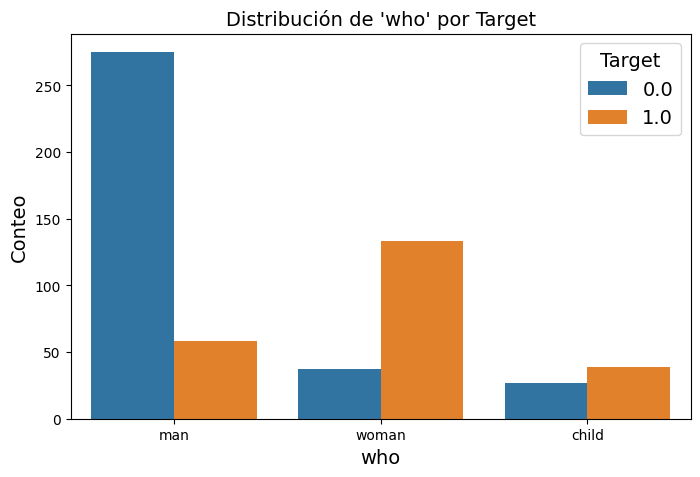


Distribución de valores para la columna categórica 'embark_town':
embark_town
Southampton    443
Cherbourg      104
Queenstown      22
Name: count, dtype: int64


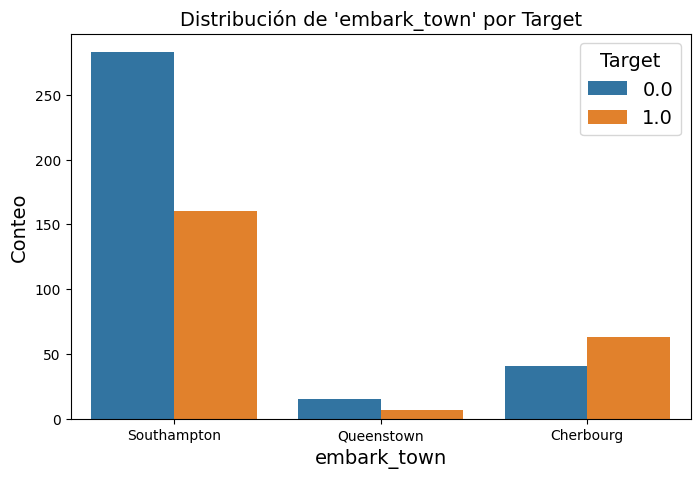


Distribución de valores para la columna categórica 'class':
class
Third     281
First     146
Second    142
Name: count, dtype: int64


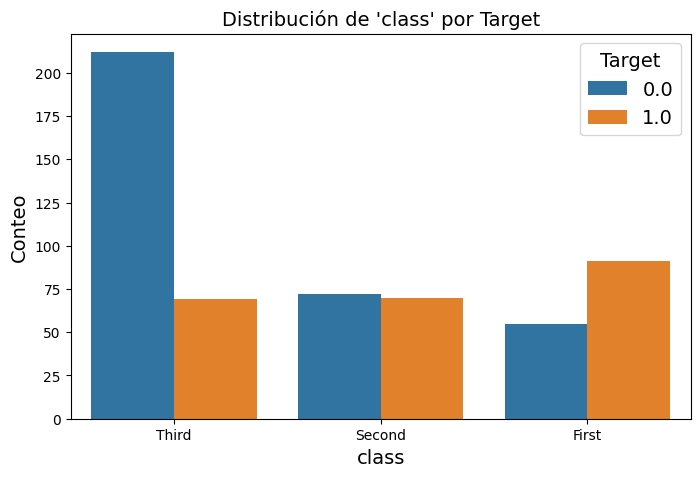

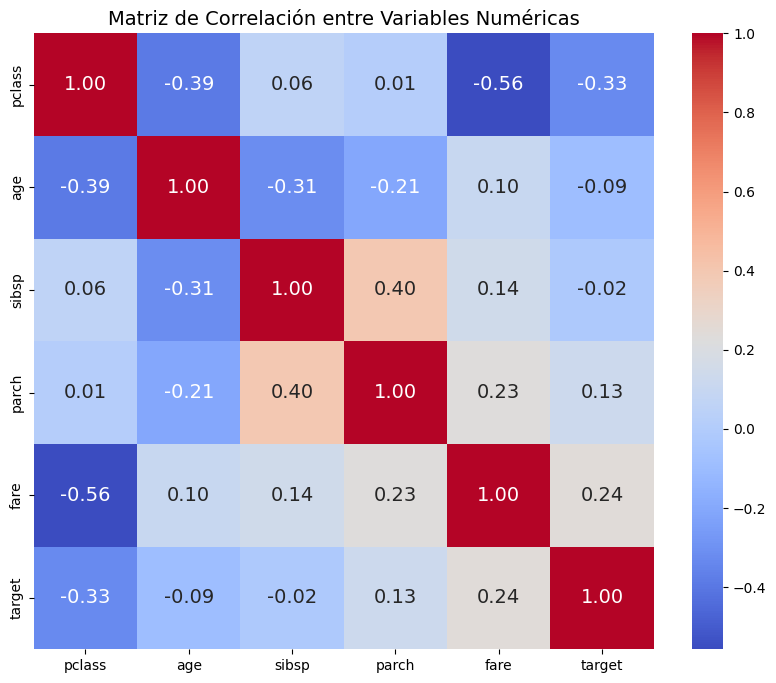


Generando pairplot para las variables numéricas...


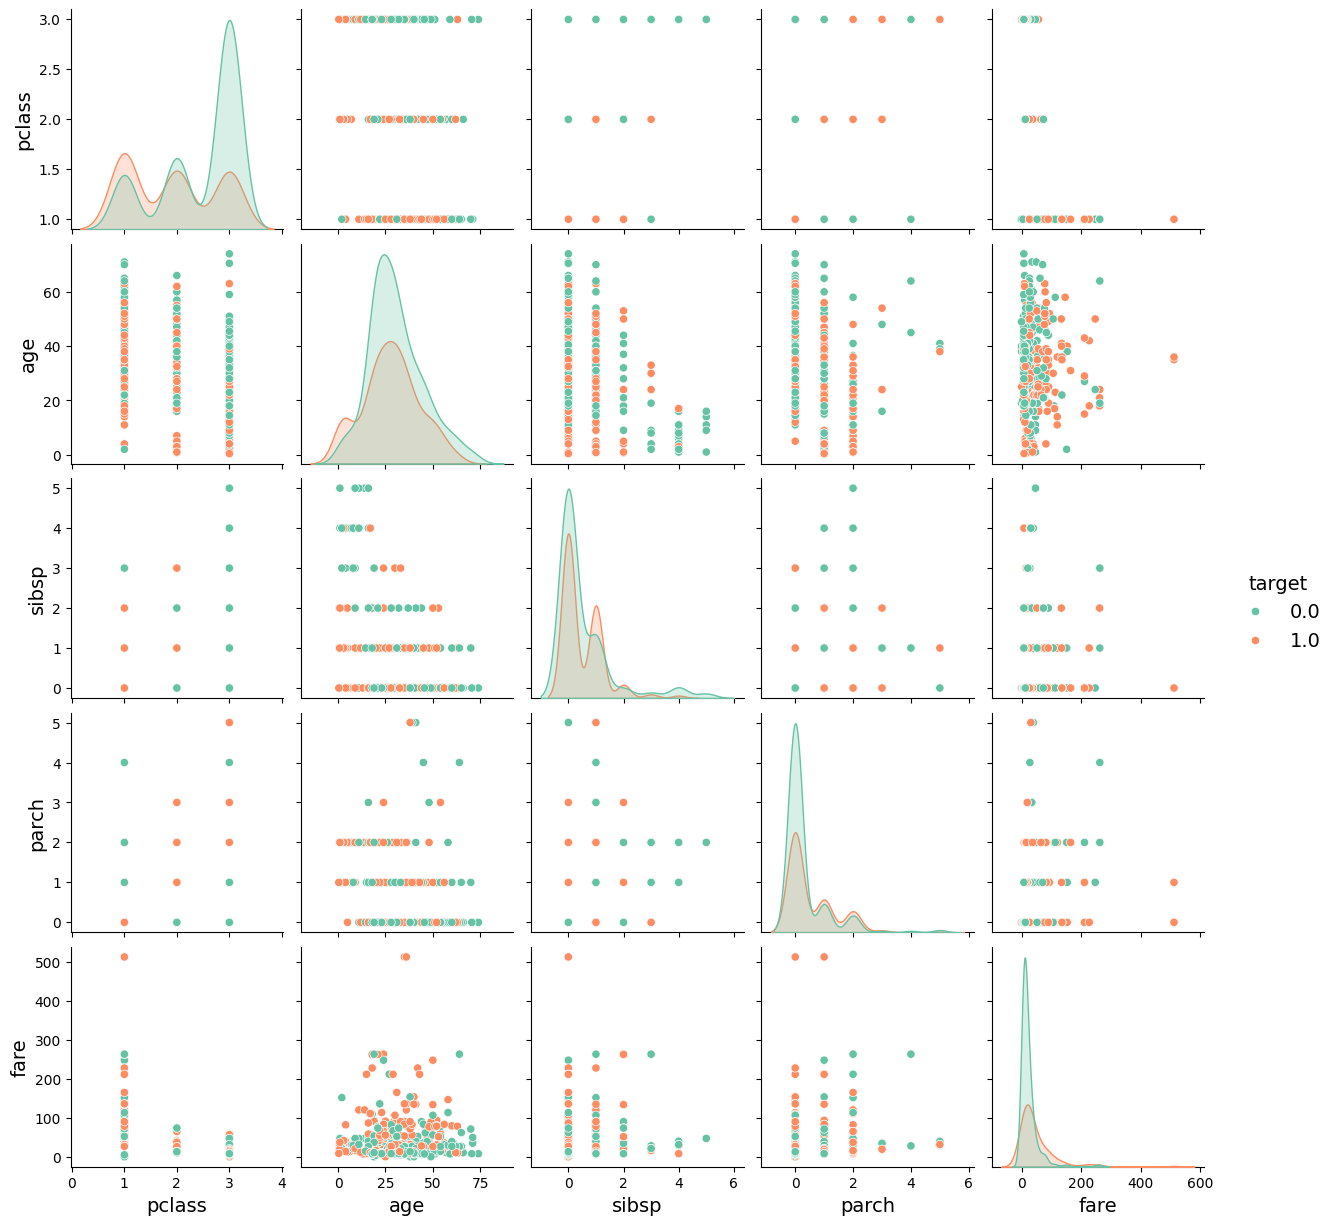


Estadísticas descriptivas de las variables numéricas:
           pclass         age       sibsp       parch        fare      target
count  569.000000  569.000000  569.000000  569.000000  569.000000  569.000000
mean     2.237258   29.500439    0.523726    0.411248   34.086606    0.404218
std      0.833888   14.496289    0.945644    0.815527   51.556818    0.491172
min      1.000000    0.420000    0.000000    0.000000    0.000000    0.000000
25%      1.000000   20.000000    0.000000    0.000000    8.050000    0.000000
50%      2.000000   28.000000    0.000000    0.000000   15.741700    0.000000
75%      3.000000   38.000000    1.000000    1.000000   33.000000    1.000000
max      3.000000   74.000000    5.000000    5.000000  512.329200    1.000000


In [334]:
# Análisis de las variables categóricas
categorical_columns = df_EDA.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nDistribución de valores para la columna categórica '{col}':")
    print(df_EDA[col].value_counts())
    
    # Gráfico de distribución por categorías
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='target', data=df_EDA)
    plt.title(f"Distribución de '{col}' por Target")
    plt.xlabel(col)
    plt.ylabel("Conteo")
    plt.legend(title="Target")
    plt.show()


# Análisis de correlación para variables numéricas
numerical_columns = df_EDA.select_dtypes(include=['number']).columns
correlation_matrix = df_EDA[numerical_columns].corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

# # Gráficos de distribución y comparación respecto a la variable objetivo
# # Para variables numéricas
# for col in numerical_columns:
#     if col != 'target':  # Excluir la variable objetivo
#         plt.figure(figsize=(8, 5))
#         sns.boxplot(x='target', y=col, data=df_EDA)
#         plt.title(f"Distribución de '{col}' por Target")
#         plt.xlabel("Target")
#         plt.ylabel(col)
#         plt.show()

# Pairplot para variables numéricas respecto al target
print("\nGenerando pairplot para las variables numéricas...")
sns.pairplot(df_EDA, vars=[col for col in numerical_columns if col != 'target'], hue="target", palette="Set2", diag_kind="kde", height=2.5)
# plt.title("Pairplot de Variables Numéricas respecto a Target")
plt.show()

# Estadísticas descriptivas de las variables numéricas
print("\nEstadísticas descriptivas de las variables numéricas:")
print(df_EDA.select_dtypes(include=['number']).describe())


* Las variables categóricas 'who', 'embark_town' y 'clas' muestran una distribución frecuencial diferencial para las clases de la variable target
* Las variables numéricas 'age','sibsp','parch' y 'fare' muestran una distribución similar para las dos variables de la clase target

### 4. Transformaciones de variables features seleccionadas

In [335]:
# Transformar categóricas a numéricas: Transformación One-Hot Encoding para who y embark_town

categorical_columns = X_train.select_dtypes(include=['object']).columns
categorical_columns

X_train = pd.get_dummies(X_train, columns=(categorical_columns), dtype= int)
X_test = pd.get_dummies(X_test, columns=(categorical_columns), dtype= int)

In [336]:
X_train

,pclass,age,sibsp,parch,fare,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
391,3,21.0,0,0,7.7958,0,1,0,0,0,1
519,3,32.0,0,0,7.8958,0,1,0,0,0,1
211,2,35.0,0,0,21.0000,0,0,1,0,0,1
208,3,16.0,0,0,7.7500,0,0,1,0,1,0
794,3,25.0,0,0,7.8958,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
392,3,28.0,2,0,7.9250,0,1,0,0,0,1
753,3,23.0,0,0,7.8958,0,1,0,0,0,1
238,2,19.0,0,0,10.5000,0,1,0,0,0,1
224,1,38.0,1,0,90.0000,0,1,0,0,0,1


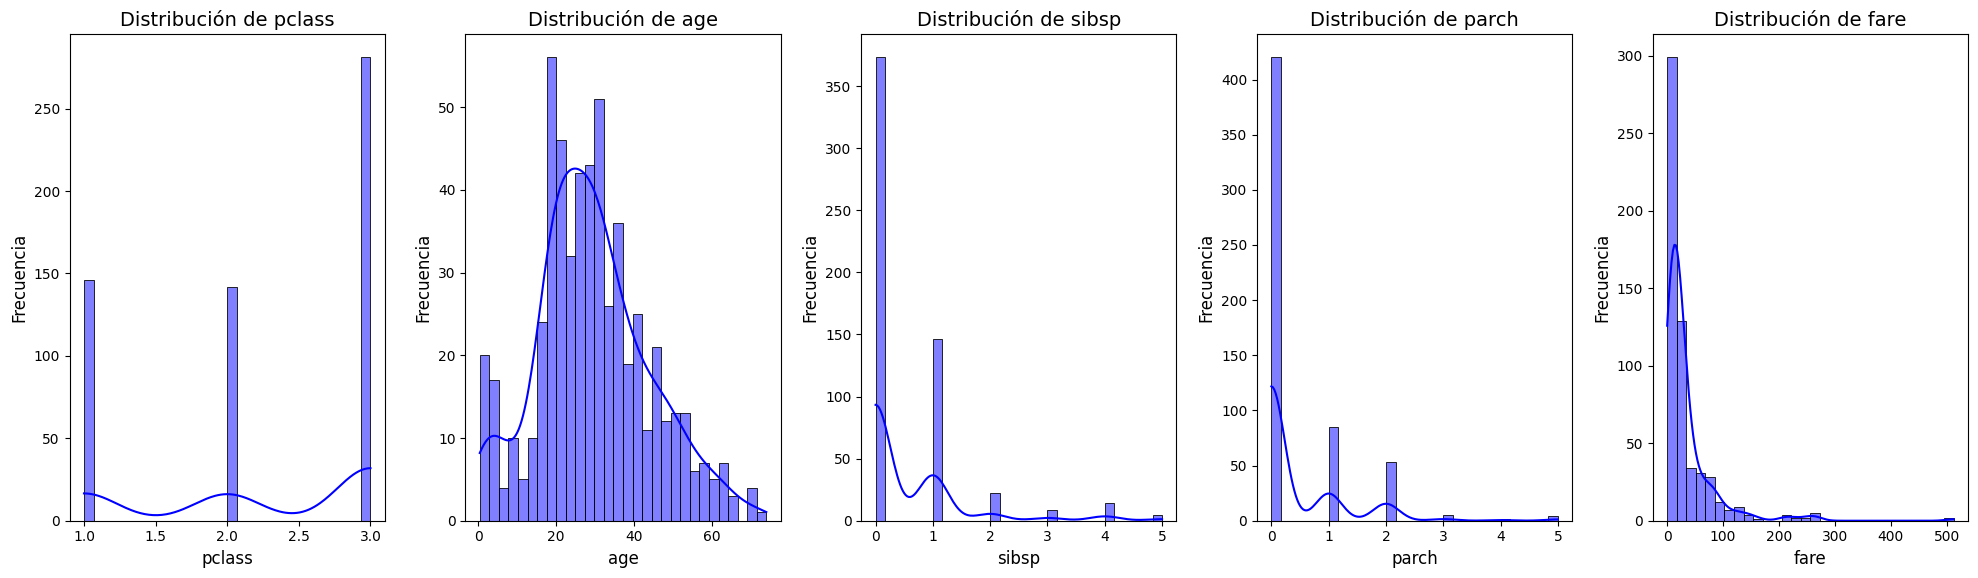

In [337]:
#  Transformación de numéricas
num_columns = ['pclass','age','sibsp','parch','fare']

# Crear la figura y los subplots
fig, axes = plt.subplots(1, len(num_columns), figsize=(20, 6), sharey=False)

# Generar un histograma para cada variable continua
for ax, column in zip(axes, num_columns):
    sns.histplot(data=X_train, x=column, kde=True, bins=30, color='blue', ax=ax)
    ax.set_title(f'Distribución de {column}', fontsize=14)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Frecuencia', fontsize=12)

# Ajustar el diseño
plt.tight_layout()
plt.show()

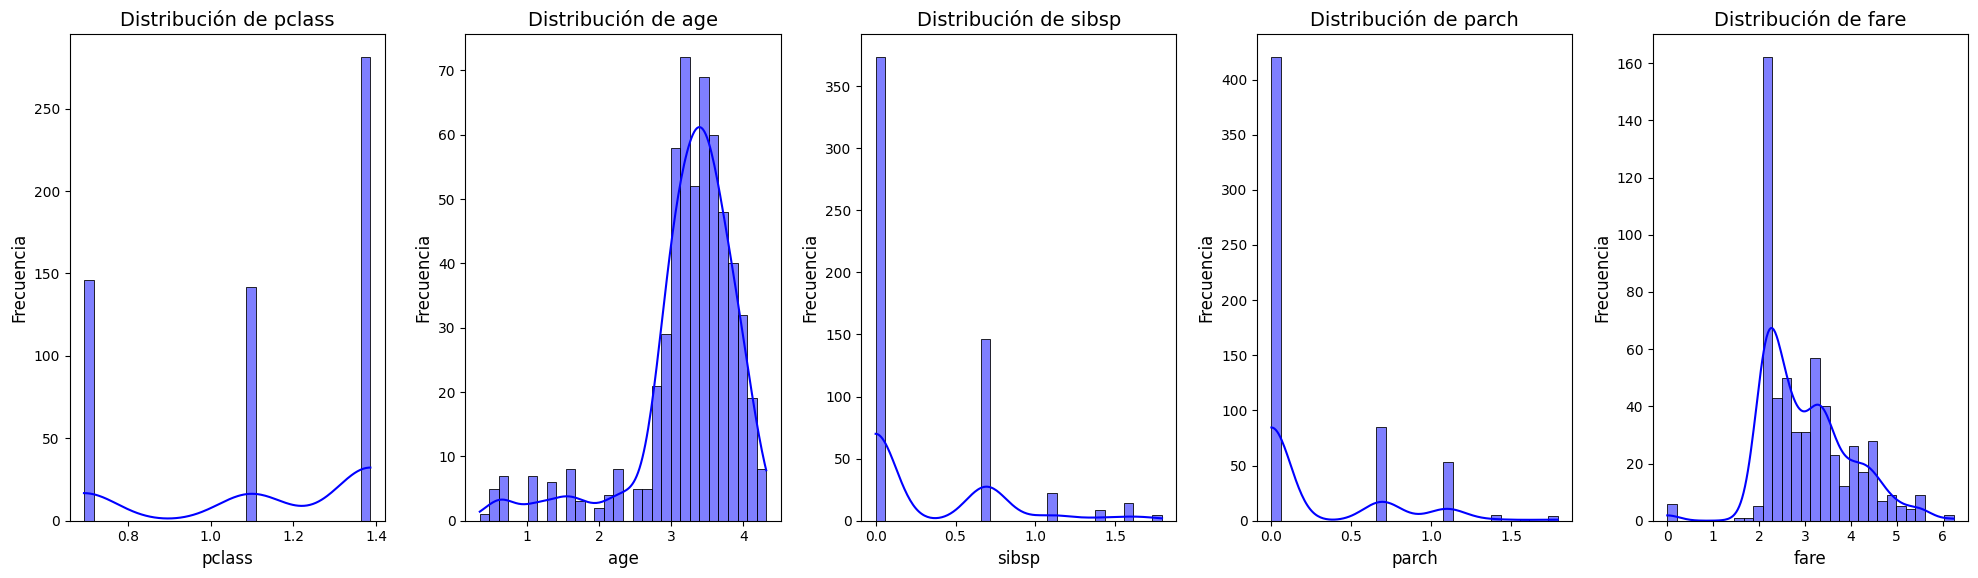

In [338]:
# Visualizar resultado de transformaciones loogarítmicas con figura
fig, axes = plt.subplots(1, len(num_columns), figsize=(20, 6), sharey=False)

# Generar un histograma para cada variable continua
for ax, column in zip(axes, num_columns):
    sns.histplot(data=(X_train[num_columns].apply(lambda x: np.log(x+1))), x=column, kde=True, bins=30, color='blue', ax=ax)
    ax.set_title(f'Distribución de {column}', fontsize=14)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Frecuencia', fontsize=12)

# Ajustar el diseño
plt.tight_layout()
plt.show()

In [339]:
# Transformación logarítimica a fare
X_train['fare'] = (X_train['fare'].apply(lambda x: np.log(x+1)))
X_train['fare']
X_test['fare'] = (X_test['fare'].apply(lambda x: np.log(x+1)))

In [340]:
# Aplicar escalado a todas las numéricas
std_scaler = StandardScaler() # seleccionamos el standar scaler por los valores extremos en la variable capital-loss
X_train[num_columns] = std_scaler.fit_transform(X_train[num_columns])
X_test[num_columns] = std_scaler.fit_transform(X_test[num_columns])

In [341]:
X_train.describe()

,pclass,age,sibsp,parch,fare,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,6.555974e-17,9.677867e-17,6.243785e-17,7.804731e-17,3.558957e-16,0.115993,0.585237,0.298770,0.182777,0.038664,0.778559
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,0.320498,0.493115,0.458121,0.386823,0.192963,0.415582
min,-1.485027e+00,-2.007826e+00,-5.543172e-01,-5.047161e-01,-3.185443e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.485027e+00,-6.559471e-01,-5.543172e-01,-5.047161e-01,-8.684379e-01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,-2.847708e-01,-1.035961e-01,-5.543172e-01,-5.047161e-01,-2.213975e-01,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,9.154855e-01,5.868426e-01,5.040938e-01,7.225636e-01,5.238027e-01,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,9.154855e-01,3.072422e+00,4.737738e+00,5.631682e+00,3.379143e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 5. Entrenar el modelo

In [342]:
log_reg = LogisticRegression(max_iter = 10000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

### 6. Analizar pesos e importancias

In [343]:
intercept = log_reg.intercept_
coefs = log_reg.coef_.ravel() #.ravel() Convierte el array multidimensional en un vector unidimensional (es decir, "aplana" el array).

features = pd.DataFrame(coefs, X_train.columns, columns=['coefficient']).copy() # dataframe con los coeficientes de las features
features['coefficient'] = np.abs(features['coefficient'])

print("Pesos")
features.sort_values('coefficient', ascending=False).head()


Pesos


,coefficient
who_man,1.852991
who_woman,1.193652
pclass,0.940252
who_child,0.691641
sibsp,0.533296


Importancia de las variable


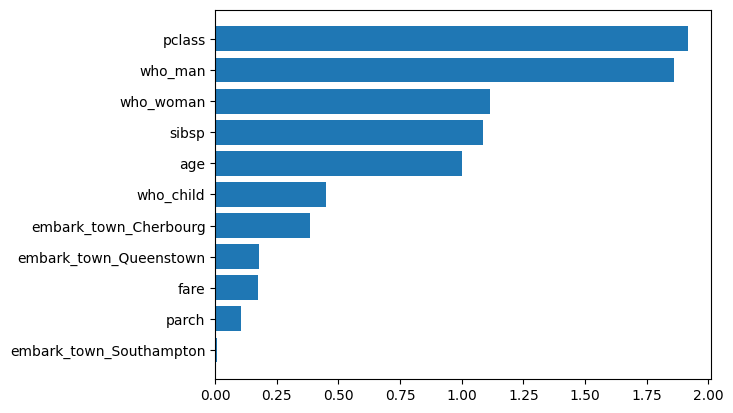

In [344]:
# Análisis de importancias
stdevs = [] # calcular las desviaciones estándar
for i in X_train.columns:
    stdev = X_train[i].std()
    stdevs.append(stdev)

features["stdev"] = np.array(stdevs).reshape(-1,1)
features["importance"] = features["coefficient"] * features["stdev"] # calcular la importancia a partir del coeficiente * std
features['importance_standarized'] = features['importance'] / y_train.std() # importancia estandarizada dividiendo entre la std de todo el dataset de train

features = features.sort_values('importance_standarized', ascending=True)
print("Importancia de las variable")
plt.barh(features.index, features.importance_standarized);


### 7. Accuracy

In [363]:
# Accuracy / aciertos
acc_train = round(accuracy_score(log_reg.predict(X_train), y_train), 3)
acc_test = round(accuracy_score(log_reg.predict(X_test), y_test), 3)

print("Accuracy train:", acc_train)
print("Accuracy test:", acc_test)

Accuracy train: 0.821
Accuracy test: 0.839


#### 8. Validación del modelo

In [364]:
cv_results = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
name='Logistic Regression'
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg)


[0.88596491 0.79824561 0.74561404 0.8245614  0.78761062]
Logistic Regression: 0.808399 (0.046379)


#### 9. Evaluar el modelo

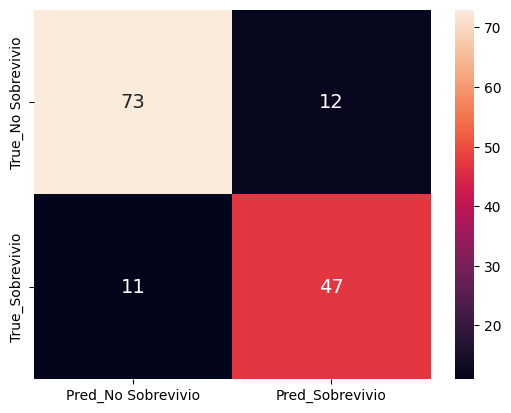

In [365]:
# Matriz de confusión 
c_matrix = confusion_matrix(y_test, log_reg.predict(X_test))
c_matrix_df = pd.DataFrame(c_matrix, columns = ['Pred_No Sobrevivio', 'Pred_Sobrevivio'],index = ['True_No Sobrevivio', 'True_Sobrevivio'])
sns.heatmap(c_matrix_df, annot=True, fmt='g');

c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


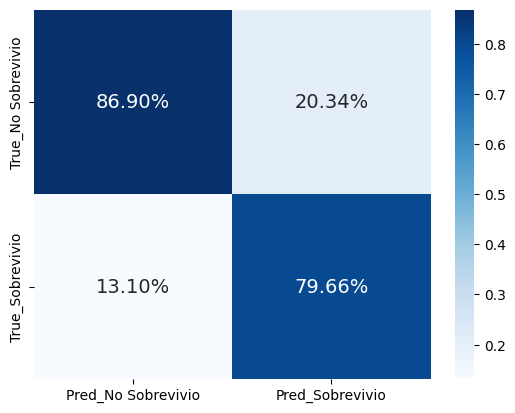

In [354]:
sns.heatmap(c_matrix_df/np.sum(c_matrix_df), annot=True,fmt='.2%', cmap='Blues');

In [357]:
# Reporte clasificación
print(classification_report(y_test, log_reg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86        85
           1       0.80      0.81      0.80        58

    accuracy                           0.84       143
   macro avg       0.83      0.83      0.83       143
weighted avg       0.84      0.84      0.84       143

